In [91]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [98]:
df = pd.read_csv("/Users/raneemaj/Documents/GitHub/Use-case-7/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [99]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [100]:
df.tail()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [102]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [103]:
df.shape

(10754, 22)

In [104]:
#dtale.show(df, open_browser=True)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [105]:
# it is Transfermarkt which it a reliable site in this field 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [106]:
# it's up-to-date for our usecase 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [107]:
# it is consistent among other sources 

In [108]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [109]:
df.head(3)


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


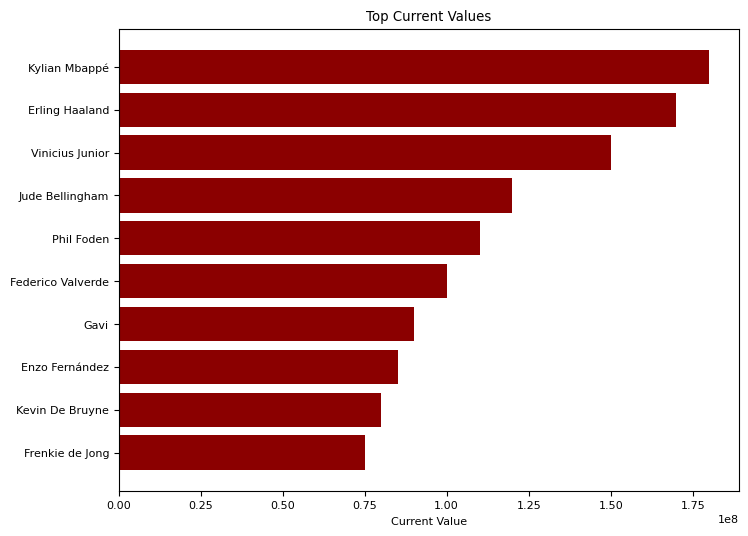

In [110]:
players = df[['name', 'team', 'current_value']]
best_players = players.sort_values(by='current_value', ascending=False).drop_duplicates('current_value')

top_10 = best_players.head(10)

plt.figure(figsize=(8, 6))
plt.barh(top_10['name'], top_10['current_value'], color='darkred')
plt.xlabel('Current Value')
plt.title('Top Current Values')
plt.gca().invert_yaxis()
plt.show()

## Interpretation of the Model

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [111]:
df.duplicated().sum()

0

In [43]:
# not nedded 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
#Display number missing values per column
df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [121]:
# go to clean them 
# not needed 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [122]:
# check columns types 

# already checked above 

In [123]:
df['height'] = df['height'].astype('int')
df['age'] = df['age'].astype('int')

In [124]:
df.drop(["position","team","position_encoded","player","name"], axis=1, inplace=True)

num_features = list(df.select_dtypes('number'))
categorical_features = list(df.select_dtypes(object).columns)

num_features.remove("highest_value")

print(num_features)



['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'winger', 'player_price_category_encoded']


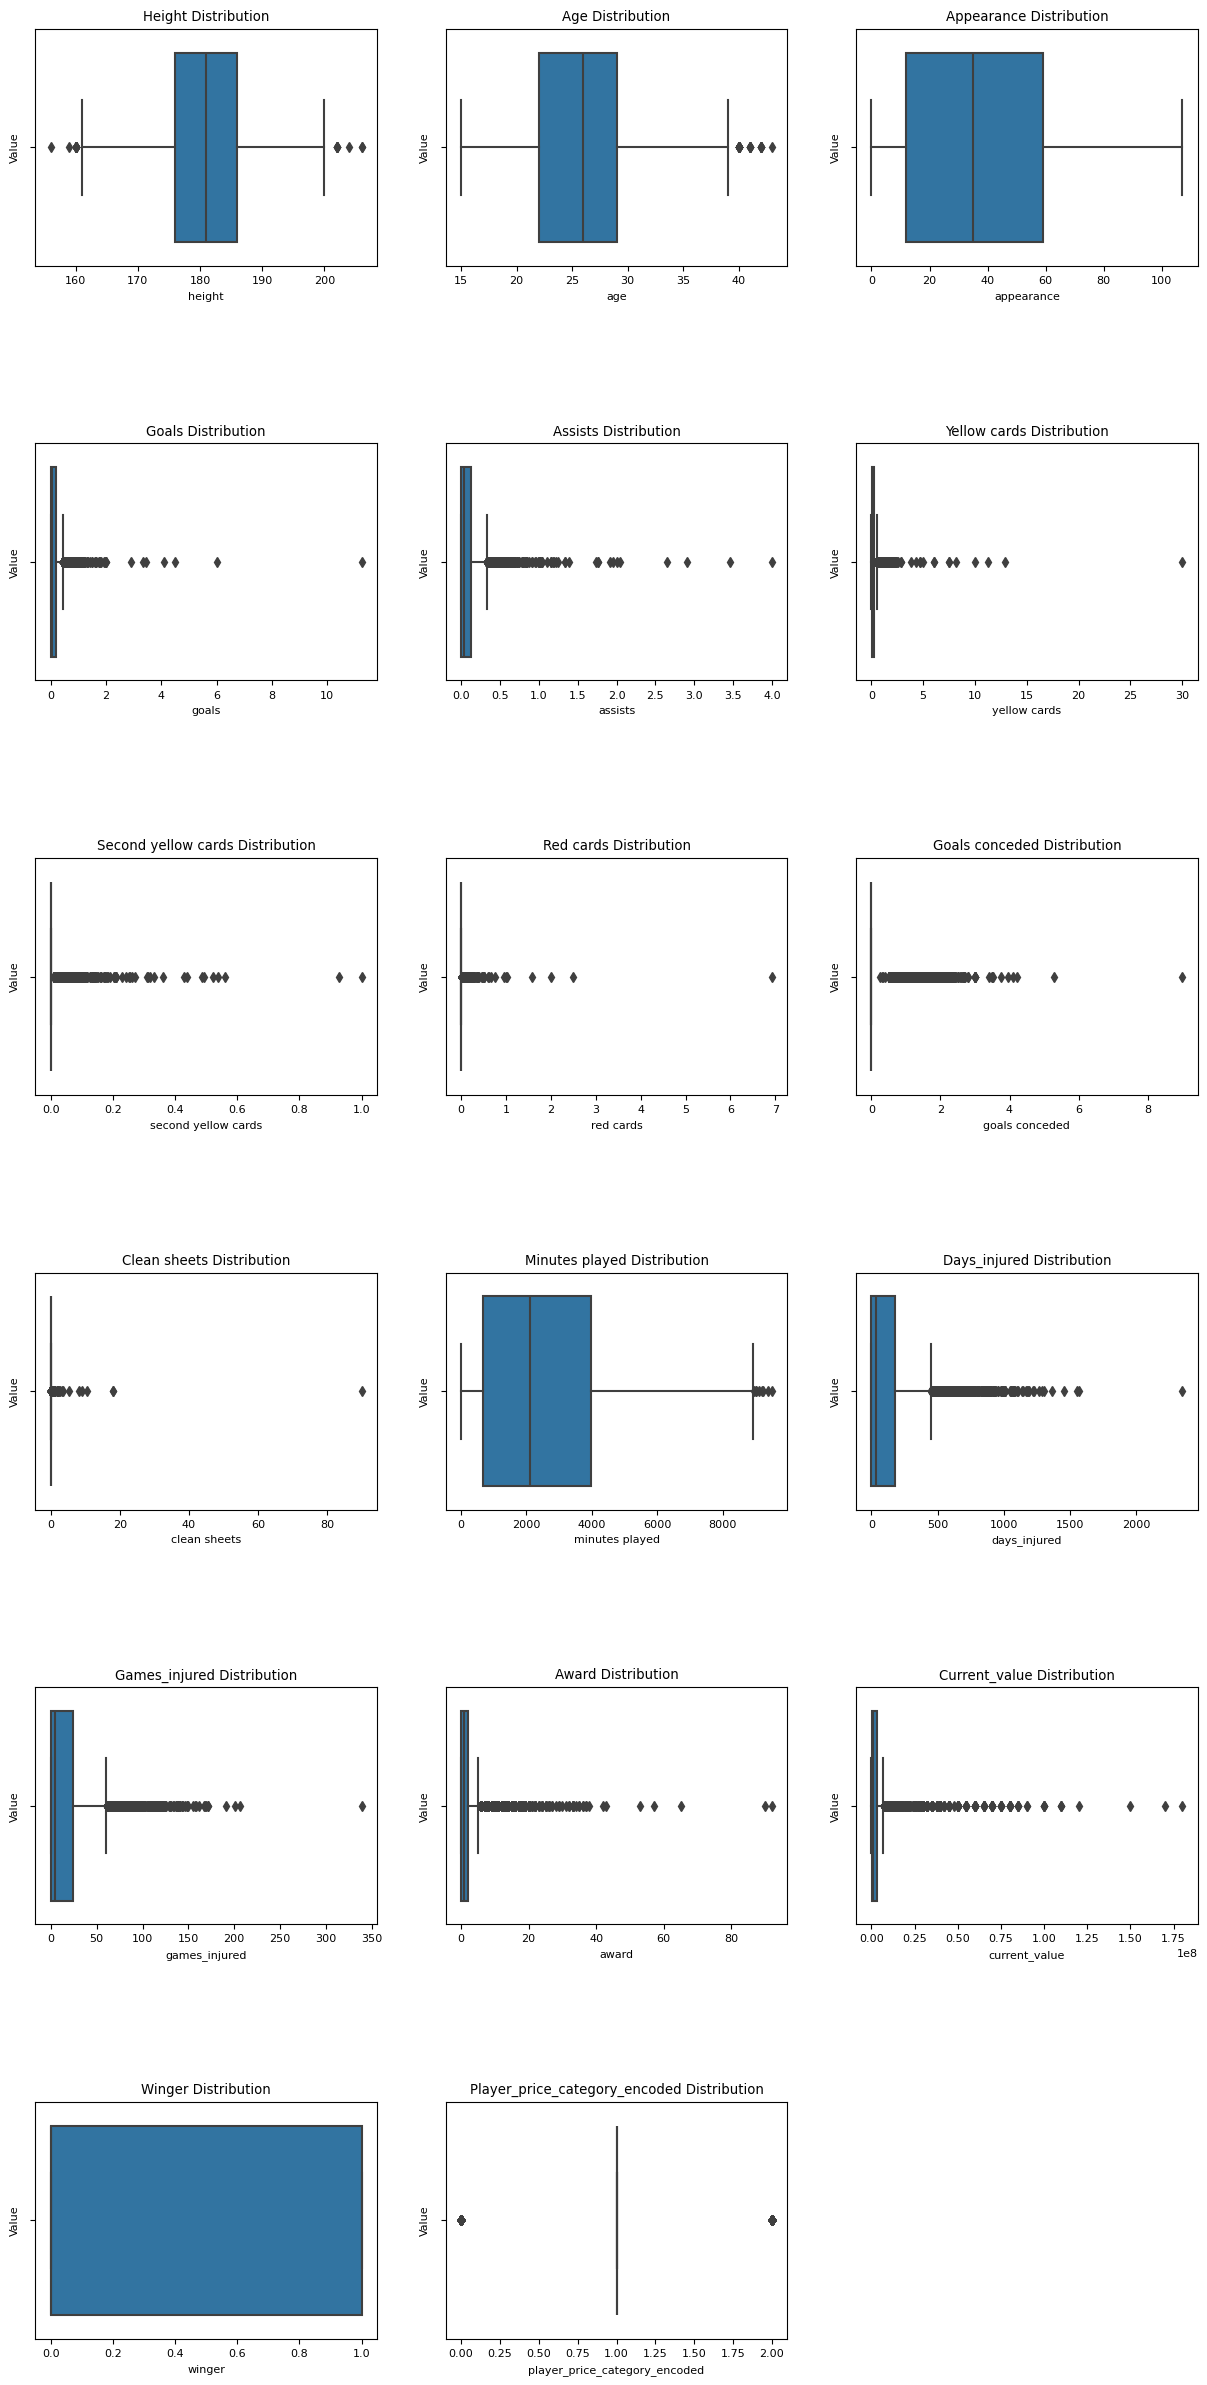

In [125]:
def plot_outliers(df: pd.DataFrame, features: list[str]) -> None:
    n_rows: int = (len(features) + 2) // 3
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, column in enumerate(features, 1):
        plt.subplot(n_rows, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'{column.capitalize()} Distribution')
        plt.xlabel(column)
        plt.ylabel('Value')
    
    plt.subplots_adjust(hspace=0.75)
    plt.show()


plot_outliers(df, num_features)

In [126]:
def detect(df):

    outliers = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            
           
            IQR = Q3 - Q1
            
          
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
           
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    
    return outliers

In [127]:
'''def detect(df):

    outliers = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            
            lower_bound = df[col].quantile(0.05)
            upper_bound = df[col].quantile(0.95)
            
            df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
    return outliers

outliers = detect(df)

for col, values in outliers.items():
    if values:
        print(f"Outliers in '{col}' column: {values}")'''

'def detect(df):\n\n    outliers = {}\n    \n    for col in df.columns:\n        if df[col].dtype in [\'int64\', \'float64\']:\n            \n            lower_bound = df[col].quantile(0.05)\n            upper_bound = df[col].quantile(0.95)\n            \n            df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]\n    return outliers\n\noutliers = detect(df)\n\nfor col, values in outliers.items():\n    if values:\n        print(f"Outliers in \'{col}\' column: {values}")'

In [128]:
def remove_outliers_zscore(df: pd.DataFrame, columns: list[str], threshold: float = 3.0) -> pd.DataFrame:
 
   
    z_scores = np.abs(df[columns].apply(zscore))

    cleaned_df = df[(z_scores < threshold).all(axis=1)]
    
    return cleaned_df


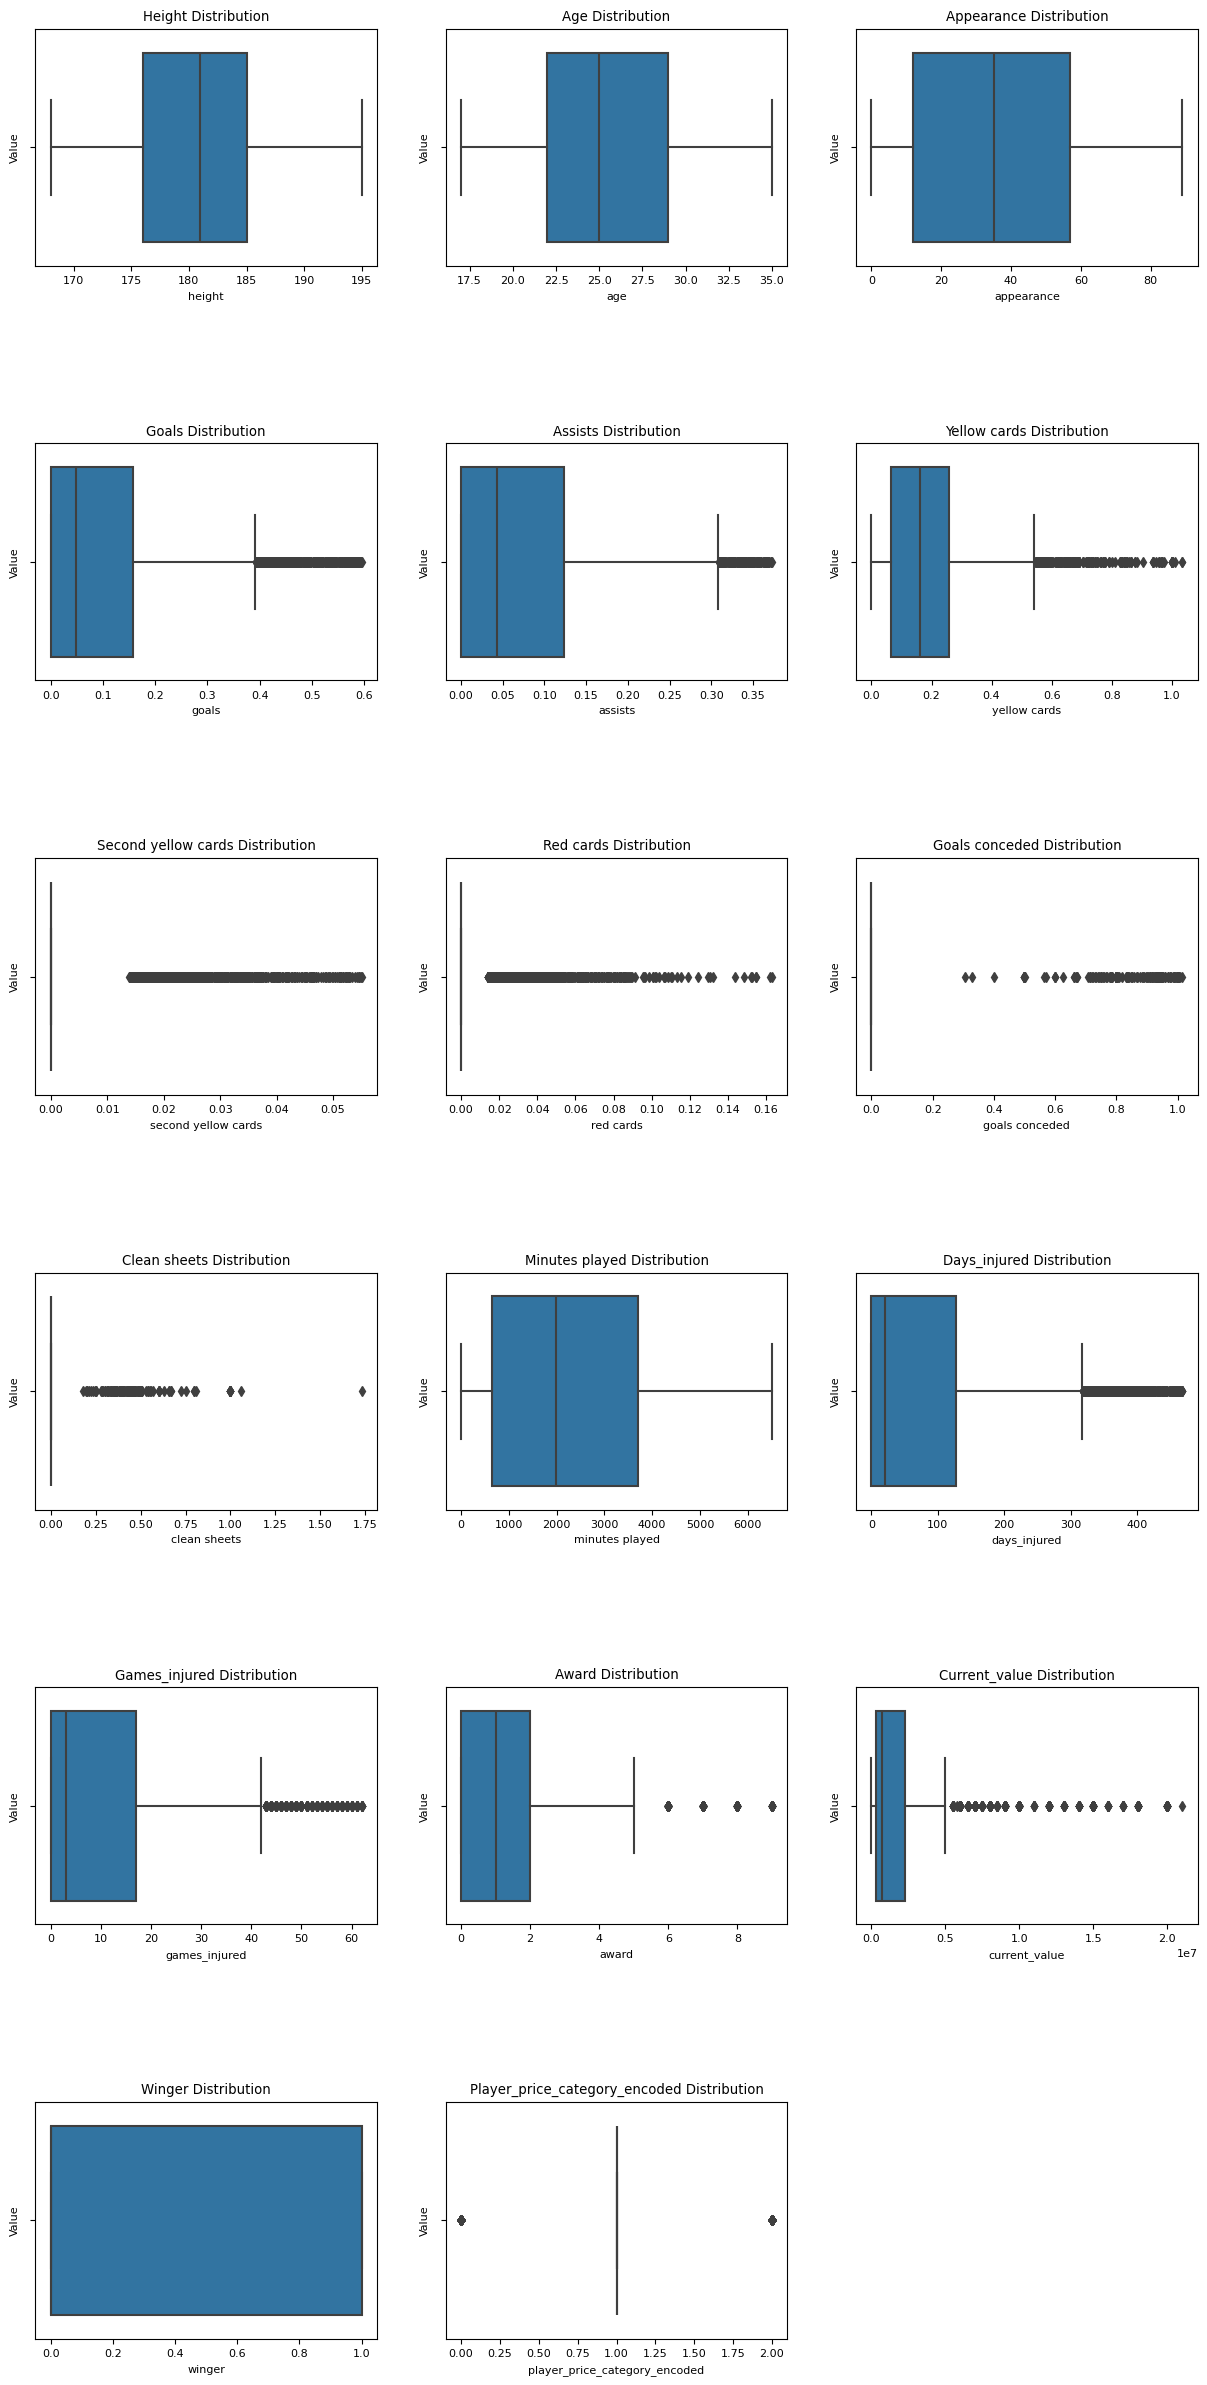

In [129]:
filtered_data = remove_outliers_zscore(df, num_features, 2.0)

plot_outliers(filtered_data, num_features)

In [130]:
df = filtered_data.copy()

In [131]:
# go to delete ouliers
# done above

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

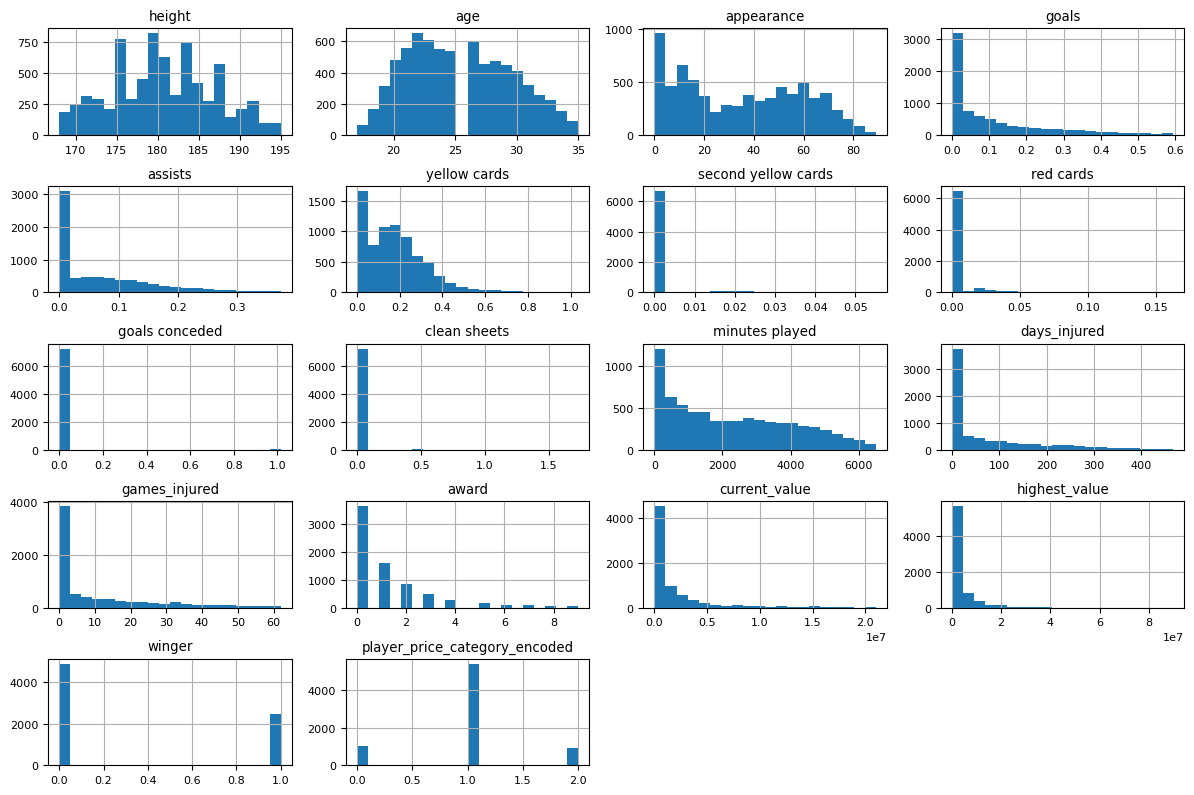

In [132]:
df.hist(figsize=(12,8),bins=20)
plt.tight_layout()
plt.show()

In [133]:
'''ages = df['age']

plt.figure(figsize=(8, 6))
plt.hist(ages, bins=10, edgecolor='black', facecolor='darkred', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Player Ages')

plt.grid(True)
plt.show()'''

"ages = df['age']\n\nplt.figure(figsize=(8, 6))\nplt.hist(ages, bins=10, edgecolor='black', facecolor='darkred', alpha=0.7)\n\nplt.xlabel('Age')\nplt.ylabel('Count')\nplt.title('Distribution of Player Ages')\n\nplt.grid(True)\nplt.show()"

In [134]:
'''plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='age', y='award', alpha=.8)'''

"plt.figure(figsize=(10, 4))\nsns.barplot(data=df, x='age', y='award', alpha=.8)"

In [135]:
df = pd.get_dummies(df, columns=categorical_features)

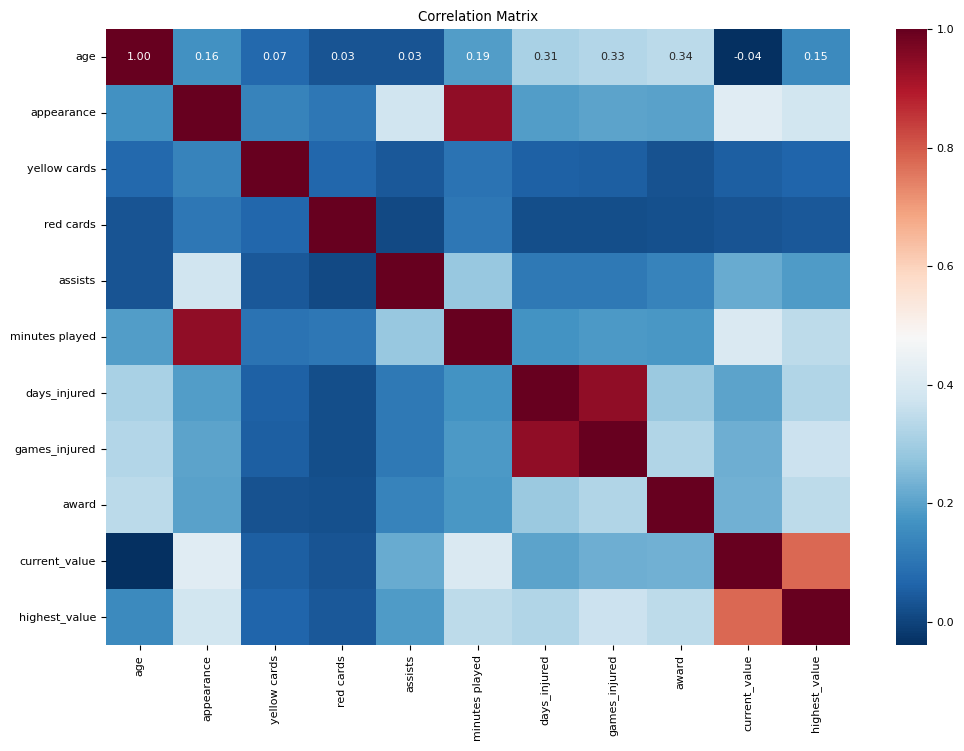

In [136]:
columns = [ 'age', 'appearance',  'yellow cards', 
            'red cards','assists',
           'minutes played', 'days_injured', 'games_injured', 'award', 'current_value','highest_value']
plt.figure(figsize=(12, 8))
sns.heatmap(df[columns].corr(), annot=True, fmt='.2f', cmap='RdBu_r', cbar=True)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.title('Correlation Matrix')
plt.show()

#### 3. Feature engineering

on prepare the data for modeling, i performed the following feature engineering step:
Encoding Categorical Features: The team and position features was encoded as a numerical value using a one-hot encoding approach.
Scaling Features: The numerical features were scaled using standard scaler to ensure they are on a similar scale.

In [137]:
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,days_injured,games_injured,award,current_value,highest_value,winger,player_price_category_encoded,player_price_category_0,player_price_category_1,player_price_category_2
8,186,21,34,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,...,47,13,0,2000000,2000000,0,1,False,True,False
11,180,22,34,0.000000,0.033507,0.335071,0.0,0.0,0.0,0.0,...,175,28,1,10000000,12000000,1,2,False,False,True
17,177,29,74,0.144046,0.086428,0.230474,0.0,0.0,0.0,0.0,...,280,35,8,20000000,42000000,0,2,False,False,True
20,181,20,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,...,0,0,1,800000,800000,0,1,False,True,False
21,175,18,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,...,0,0,1,800000,800000,0,1,False,True,False


In [138]:
p15 = df['current_value'].quantile(0.15)
p85 = df['current_value'].quantile(0.85)


def categorize_price(price):
    if price < p15:
        return '0'
    elif price < p85:
        return '1'
    else:
        return '2'
    

df['player_price_category'] = df['current_value'].apply(categorize_price)

print(df['player_price_category'].value_counts())

player_price_category
1    5175
2    1157
0    1027
Name: count, dtype: int64


In [139]:
encoder = LabelEncoder()
df['player_price_category_encoded'] = encoder.fit_transform(df['player_price_category'])  

In [140]:
correlation = df.corr(numeric_only=True)
print(correlation['player_price_category_encoded'].sort_values(ascending=False))

player_price_category_encoded    1.000000
current_value                    0.698667
player_price_category_2          0.686184
highest_value                    0.572484
appearance                       0.478814
minutes played                   0.455045
games_injured                    0.274823
award                            0.263948
assists                          0.260463
days_injured                     0.255236
goals                            0.203144
yellow cards                     0.120678
age                              0.106876
second yellow cards              0.106758
player_price_category_1          0.074319
height                           0.058685
red cards                        0.052817
winger                           0.024340
goals conceded                  -0.034639
clean sheets                    -0.048612
player_price_category_0         -0.752716
Name: player_price_category_encoded, dtype: float64


In [141]:
threshold = 0.2
selected_features = correlation[abs(correlation['player_price_category_encoded']) > threshold]['player_price_category_encoded'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'player_price_category_encoded', 'player_price_category_0',
       'player_price_category_2'],
      dtype='object')

In [142]:
df[selected_features]

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,player_price_category_encoded,player_price_category_0,player_price_category_2
8,34,0.000000,0.000000,2758,47,13,0,2000000,2000000,1,False,False
11,34,0.000000,0.033507,2686,175,28,1,10000000,12000000,2,False,True
17,74,0.144046,0.086428,3124,280,35,8,20000000,42000000,2,False,True
20,39,0.129125,0.064562,2788,0,0,1,800000,800000,1,False,False
21,51,0.153759,0.102506,3512,0,0,1,800000,800000,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10749,16,0.175953,0.087977,1023,0,0,0,75000,75000,0,True,False
10750,26,0.372671,0.186335,1449,102,18,0,300000,300000,1,False,False
10751,20,0.375000,0.000000,960,0,0,0,50000,50000,0,True,False
10752,17,0.312139,0.104046,865,0,0,0,50000,50000,0,True,False


#### 4. Prepare train and test data

In [143]:

X = df.drop(['player_price_category_encoded'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Buliding the Model

In [146]:
wcss = []
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  

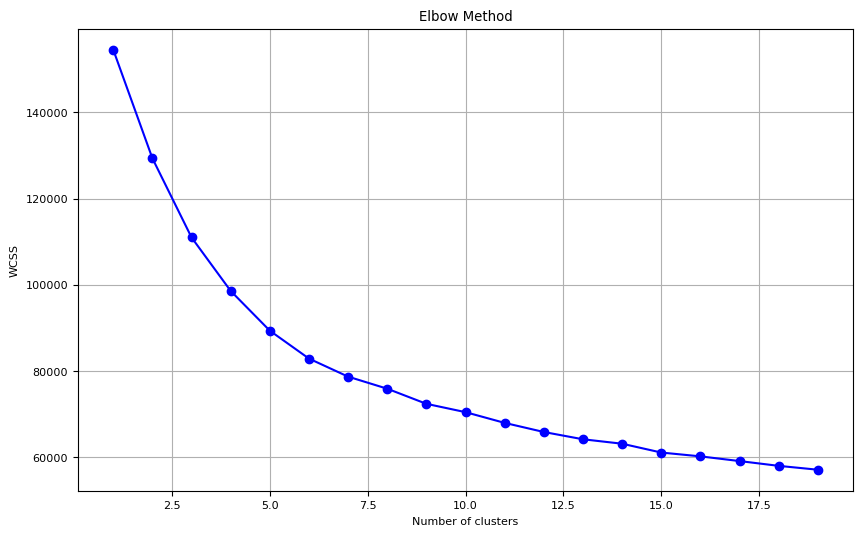

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Train the Model

## Test the Model

In [148]:
# Predict and evaluate the model
y_pred= kmeans.predict(X_scaled)


In [149]:
X.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,days_injured,games_injured,award,current_value,highest_value,winger,player_price_category_0,player_price_category_1,player_price_category_2,player_price_category
8,186,21,34,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,...,47,13,0,2000000,2000000,0,False,True,False,1
11,180,22,34,0.000000,0.033507,0.335071,0.0,0.0,0.0,0.0,...,175,28,1,10000000,12000000,1,False,False,True,2
17,177,29,74,0.144046,0.086428,0.230474,0.0,0.0,0.0,0.0,...,280,35,8,20000000,42000000,0,False,False,True,2
20,181,20,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,...,0,0,1,800000,800000,0,False,True,False,1
21,175,18,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,...,0,0,1,800000,800000,0,False,True,False,1


## Interpretation of the Model

## Evaluating the Model 

In [150]:
optimal_clusters = 6

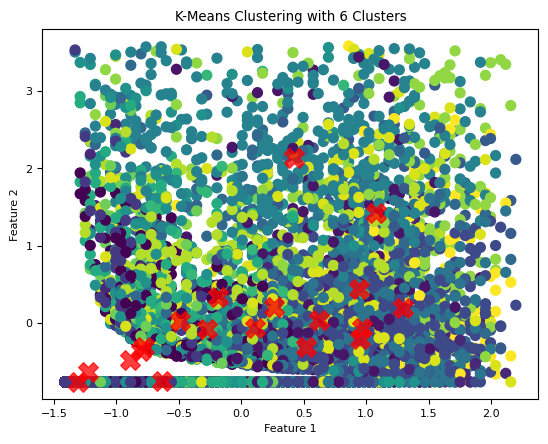

In [151]:

plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [152]:
X['kmeans'] = y_pred

kmeans
0     804
4     725
6     649
3     606
7     557
11    553
8     427
14    386
1     360
16    355
9     354
2     323
17    319
15    219
5     201
18    180
12    176
10    148
13     17
Name: count, dtype: int64

In [154]:
X['kmeans'].value_counts()

kmeans
0     804
4     725
6     649
3     606
7     557
11    553
8     427
14    386
1     360
16    355
9     354
2     323
17    319
15    219
5     201
18    180
12    176
10    148
13     17
Name: count, dtype: int64

In [155]:
X[X['kmeans']==0]

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,games_injured,award,current_value,highest_value,winger,player_price_category_0,player_price_category_1,player_price_category_2,player_price_category,kmeans
8,186,21,34,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,...,13,0,2000000,2000000,0,False,True,False,1,0
177,172,19,13,0.134328,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,4000000,4000000,0,False,True,False,2,0
283,182,26,14,0.236842,0.000000,0.236842,0.0,0.0,0.0,0.0,...,19,3,4000000,8000000,0,False,True,False,2,0
310,173,22,25,0.052478,0.000000,0.209913,0.0,0.0,0.0,0.0,...,17,1,500000,500000,0,False,True,False,1,0
349,183,20,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,500000,500000,0,False,True,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,182,23,31,0.172855,0.000000,0.172855,0.0,0.0,0.0,0.0,...,0,0,200000,200000,0,False,True,False,1,0
10630,183,31,4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,250000,350000,0,False,True,False,1,0
10631,190,19,20,0.000000,0.000000,0.147179,0.0,0.0,0.0,0.0,...,0,0,200000,200000,0,False,True,False,1,0
10712,179,22,14,0.000000,0.156250,0.000000,0.0,0.0,0.0,0.0,...,2,0,200000,200000,0,False,True,False,1,0


<Axes: xlabel='age', ylabel='current_value'>

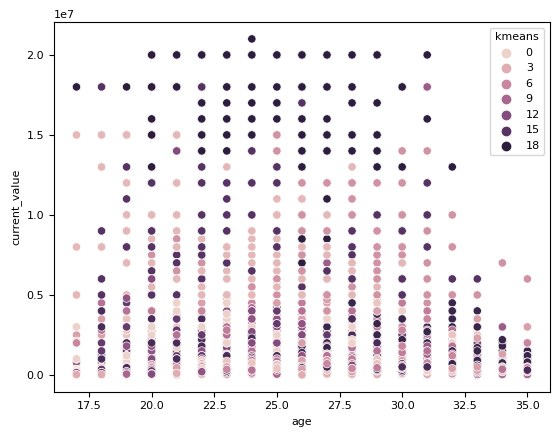

In [156]:
sns.scatterplot(data = X , x = 'age', y = 'current_value', hue = 'kmeans')

<Axes: xlabel='appearance', ylabel='current_value'>

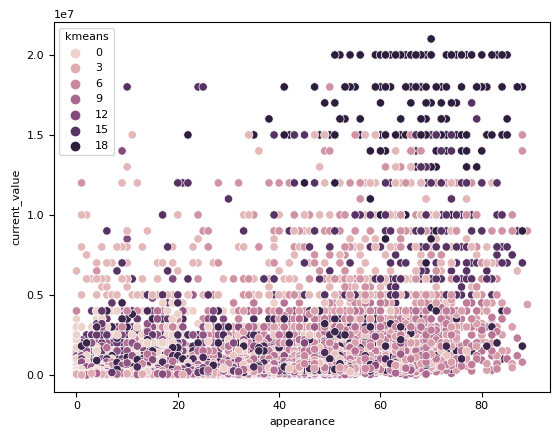

In [157]:
sns.scatterplot(data = X , x = 'appearance', y = 'current_value', hue = 'kmeans')

<Axes: xlabel='games_injured', ylabel='award'>

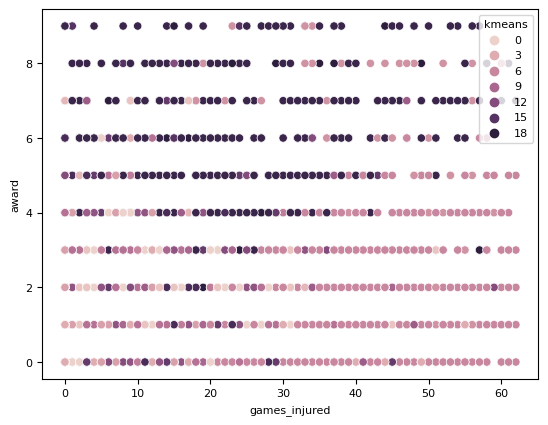

In [161]:
sns.scatterplot(data = X , x = 'games_injured', y = 'award', hue = 'kmeans')